In [1]:
pip install pyserial

Note: you may need to restart the kernel to use updated packages.


In [2]:
#to reload old data comment out file definition and run this cell to refresh memory
date=f"05Aug2025"
#f"05Aug2025"

file="robot_log_"+date
filename=file+ ".csv"
txtfile=file+ ".txt"

In [3]:
#for raw encoder position data I had to add 0's to the csv so it could read right
import csv

input_path = filename
output_path = "robot_log_05Aug2025_fixed.csv"
expected_columns = 7

with open(input_path, "r") as infile, open(output_path, "w", newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        if not row:
            continue

        expanded_row = []
        for cell in row:
            expanded_row.extend(cell.split(','))

        if len(expanded_row) < expected_columns:
            expanded_row += ['0'] * (expected_columns - len(expanded_row))
        elif len(expanded_row) > expected_columns:
            expanded_row = expanded_row[:expected_columns]

        writer.writerow([val.strip() for val in expanded_row])


In [4]:
import pandas as pd

# load the CSV
df=pd.read_csv(output_path)

# save as TXT (default tab-delimited, change sep if needed)
df.to_csv(txtfile, sep= ',', index=False) # or sep= '\t' ',' or sep=' ' depending on what you want


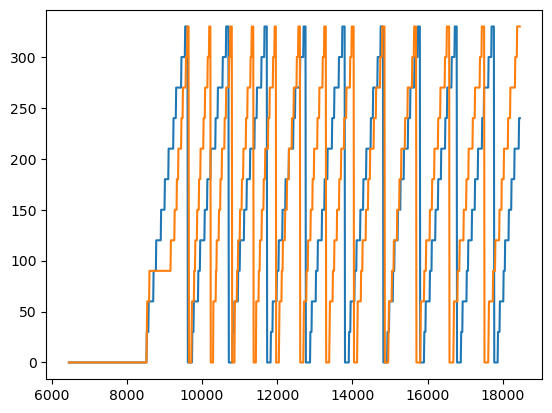

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

data=pd.read_csv("robot_log_29Jul2025.csv", delimiter=",", header=None)
time = data.iloc[:, 0].to_numpy()
right_count= data.iloc[:, 1].to_numpy()
left_count= data.iloc[:, 2].to_numpy()

plt.plot(time, right_count)
plt.plot(time,left_count)